<a href="https://colab.research.google.com/github/anewmur/ML_for_OilGas/blob/master/fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.   **open source dataset**

https://github.com/zalandoresearch/fashion-mnist

2.   60 000 clothing photos

3.   28$\times$28 pixels, grayscale 0...255, binary file



In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import utils
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
classes = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'Ancle Boot']

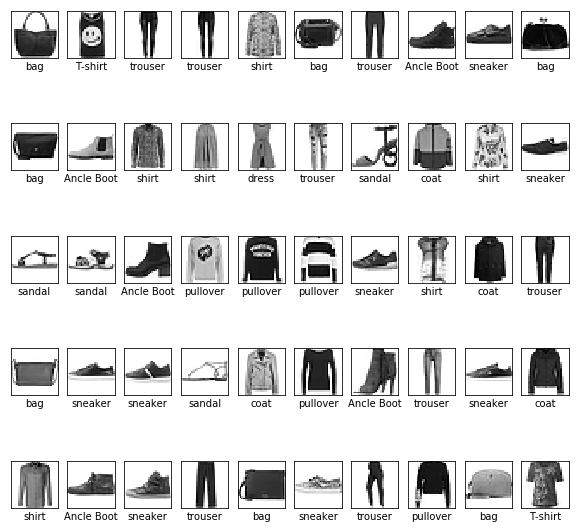

In [0]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [0]:
x_train[1].shape

(28, 28)

In [0]:
len(x_test)

10000

In [0]:
len(x_train)

60000

In [0]:
x_train = x_train.reshape(60000, 28*28)

In [0]:
x_train = x_train / 255 

In [0]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [0]:
print(y_train[0])

9


In [0]:
y_train = utils.to_categorical(y_train, 10) #one hot encoding

In [0]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Create a neural network

In [0]:
model = Sequential()
model.add(Dense(800, input_dim=28*28, activation="relu"))
model.add(Dense(10, activation="softmax"))

W0726 08:41:52.855272 139804841453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0726 08:41:52.881426 139804841453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0726 08:41:52.884939 139804841453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

W0726 08:42:00.552145 139804841453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0726 08:42:00.588050 139804841453440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model.fit(x_train, y_train, 
          batch_size=200, 
          epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4379 - acc: 0.8507
Epoch 2/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.4336 - acc: 0.8521
Epoch 3/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.4291 - acc: 0.8539
Epoch 4/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.4253 - acc: 0.8557
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.4213 - acc: 0.8563
Epoch 6/10
27200/60000 [============>.................] - ETA: 2s - loss: 0.4165 - acc: 0.8583

##Using the network to recognize clothing patterns

In [0]:
x_test = x_test.reshape(10000, 784)
x_test = x_test / 255 

In [0]:
predictions = model.predict(x_test)

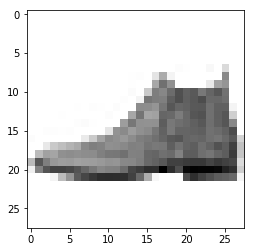

In [0]:
n = 0
plt.imshow(x_test[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [0]:
print(predictions[n])

[7.05601269e-05 2.42149690e-05 1.16427218e-04 5.77533974e-05
 1.00844525e-04 1.21015176e-01 2.05613571e-04 2.94634640e-01
 9.65423603e-03 5.74120522e-01]


In [0]:
np.argmax(y_train[n])

9

In [0]:
classes[np.argmax(y_train[n])]

'Ancle Boot'

In [0]:
y_test = utils.to_categorical(y_test, 10) #one hot encoding

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5032297989845276
Test accuracy: 0.8272


## Cross validtion

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier  #It enables us to include K-fold cross validation in our Keras code.
 
from sklearn.model_selection import cross_val_score

In [0]:
def make_classifier():
  modelCl = Sequential()
  modelCl.add(Dense(800, input_dim=784, activation="relu"))
  modelCl.add(Dense(10, activation="softmax"))
  modelCl.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
  return modelCl

In [0]:
classiifier = KerasClassifier(build_fn = make_classifier,
                            batch_size=10, nb_epoch=5)

In [0]:
accuracies = cross_val_score(estimator = classiifier,
                             X = x_train,
                             y = y_train,
                             cv = 4,
                             n_jobs = -1)

KeyboardInterrupt: ignored

In [0]:
mean = accuracies.mean()
mean

0.8328333285351593

In [0]:
variance = accuracies.var()
variance 

0.00010950748758643955

###Parameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
def make_classifier(optimizer):
  modelCl = Sequential()
  modelCl.add(Dense(800, input_dim=784, activation="relu"))
  modelCl.add(Dense(10, activation="softmax"))
  modelCl.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
  return modelCl

In [0]:
classifier = KerasClassifier(build_fn = make_classifier)

In [0]:
params = {
    'batch_size':[5,10],

    'nb_epoch':[20,50],

    'Optimizer':['adam','SGD']
}

In [0]:
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=params,
                           scoring='accuracy',
                           cv=4)

In [0]:
grid_search = grid_search.fit(X_train,y_train)

In [0]:
best_param = grid_search.best_params_

best_accuracy = grid_search.best_score_